In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA of Datasets

#### Exploring the Calendar Dataset

In [2]:
#Calendar Data:

calendar = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/calendar.csv')
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9477671,2024-02-17,f,$95.00,$95.00,1,14
1,9477671,2024-02-16,f,$95.00,$95.00,1,14
2,9477671,2024-02-15,f,$90.00,$90.00,1,14
3,9477671,2024-02-14,f,$90.00,$90.00,1,14
4,9477671,2024-02-13,f,$90.00,$90.00,1,14


In [3]:
calendar['listing_id'].nunique()

302

There are a total of 302 individual property listings

In [4]:
calendar.shape

(110230, 7)

In [5]:
calendar.dtypes

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

#### Converting the data types into the correct format

In [6]:
#converting price & adjusted price to integer

calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
calendar['price'] = pd.to_numeric(calendar['price'])

calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')
calendar['adjusted_price'] = pd.to_numeric(calendar['adjusted_price'])

/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_88654/2502108965.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = calendar['price'].str.replace('$', '').str.replace(',','')
/var/folders/51/q9hxxxv54rs_ms2xxv3y82fm0000gn/T/ipykernel_88654/2502108965.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$', '').str.replace(',','')


In [7]:
#Converting the date column into the correct data formart

calendar['date'] = pd.to_datetime(calendar['date'])

In [8]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,9477671,2024-02-17,f,95.0,95.0,1,14
1,9477671,2024-02-16,f,95.0,95.0,1,14
2,9477671,2024-02-15,f,90.0,90.0,1,14
3,9477671,2024-02-14,f,90.0,90.0,1,14
4,9477671,2024-02-13,f,90.0,90.0,1,14


In [9]:
calendar.describe()

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
count,1.102300e+05,110230.000000,110230.000000,110230.000000,110230.000000
mean,3.639725e+17,158.217364,158.001842,9.247727,819.685013
std,3.780488e+17,361.324553,361.329678,32.739374,442.995694
min,1.995680e+05,23.000000,23.000000,1.000000,2.000000
25%,3.897651e+07,62.000000,62.000000,1.000000,365.000000
50%,5.424034e+07,105.000000,105.000000,2.000000,1125.000000
75%,7.426915e+17,161.000000,160.000000,3.000000,1125.000000
max,9.177306e+17,6000.000000,6000.000000,600.000000,1125.000000


Based on the descriptive statistics, price_usd and adjusted_price_usd are the same so we can drop on of the columns

In [10]:
del calendar['adjusted_price']

In [11]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,9477671,2024-02-17,f,95.0,1,14
1,9477671,2024-02-16,f,95.0,1,14
2,9477671,2024-02-15,f,90.0,1,14
3,9477671,2024-02-14,f,90.0,1,14
4,9477671,2024-02-13,f,90.0,1,14


#### Exploring the Reviews dataset

In [16]:
reviews = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5021839,854504649696868877,2023-03-24,2275096,David,I very much enjoyed my stay at Sean's. What a...
1,5021839,786359791597137912,2022-12-20,485334070,Anya,Sean was very responsive and so kind. His plac...
2,5021839,780530894098598175,2022-12-12,426391081,Spencer,Sean was nothing less of a fantastic host. The...
3,7293821,828424270677068779,2023-02-16,130189619,Sebastian,I had a nice extended stay. Julie was a fantas...
4,7293821,816735901314335754,2023-01-31,130189619,Sebastian,This was a great place to stay in a convenient...


Not sure if this dataset will be necessary

#### Exploring Listings Dataset

In [19]:
listings = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/listings.csv')

listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,199568,https://www.airbnb.com/rooms/199568,20230625044427,2023-06-25,city scrape,Guest suite in Salem · ★4.90 · 1 bedroom · 1 b...,"Light and roomy, opening onto garden, this apa...","There are 2 good-sized parks nearby, hilly nei...",https://a0.muscache.com/pictures/f62ce7d3-7813...,974919,...,4.96,4.87,4.92,NaN,f,1,1,0,0,1.35
1,5021839,https://www.airbnb.com/rooms/5021839,20230625044427,2023-06-25,previous scrape,Home in Salem · ★5.0 · 2 bedrooms · 2 beds · 1...,Cute fully furnished house! Fresh bright paint...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25909376,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.46
2,7293821,https://www.airbnb.com/rooms/7293821,20230625044427,2023-06-25,city scrape,Guest suite in Salem · ★4.95 · Studio · 1 bed ...,NEWLY RENOVATED! Our home is in the quaint his...,"Safe, quiet community, historic neighborhood. ...",https://a0.muscache.com/pictures/miso/Hosting-...,38202007,...,4.99,4.98,4.90,NaN,f,1,1,0,0,4.07
3,8524259,https://www.airbnb.com/rooms/8524259,20230625044427,2023-06-25,city scrape,Home in Salem · ★5.0 · 1 bedroom · 1 bed · 1 s...,Comfort Home was initially established for tra...,Well established high end neighborhood with ve...,https://a0.muscache.com/pictures/948454d8-c934...,2421461,...,5.00,5.00,5.00,NaN,f,2,0,2,0,0.04
4,8698684,https://www.airbnb.com/rooms/8698684,20230625044427,2023-06-25,previous scrape,Home in Salem · ★4.80 · 3 bedrooms · 3 beds · ...,"The State Capitol, Salem's favorite breakfast ...",We love our neighbors and our neighborhood. Tr...,https://a0.muscache.com/pictures/5a056d03-cf09...,3208932,...,4.98,4.89,4.81,NaN,t,3,1,2,0,0.98


In [20]:
listings.shape

(302, 75)

In [42]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,3.020000e+02,3.020000e+02,3.020000e+02,302.000000,302.000000,0.0,302.000000,302.000000,302.000000,0.0,...,259.000000,259.000000,259.000000,259.000000,0.0,302.000000,302.000000,302.000000,302.000000,259.000000
mean,3.639725e+17,2.023063e+13,2.092787e+08,17.668874,28.635762,NaN,44.927717,-123.039822,3.360927,NaN,...,4.925907,4.933050,4.850270,4.814749,NaN,3.701987,2.456954,1.238411,0.006623,2.019614
std,3.786745e+17,0.000000e+00,1.756880e+08,110.968837,200.925516,NaN,0.026928,0.026862,2.302432,NaN,...,0.201356,0.171612,0.250324,0.338927,NaN,4.199026,4.329816,1.868460,0.081244,2.050122
min,1.995680e+05,2.023063e+13,1.835140e+05,1.000000,1.000000,NaN,44.858640,-123.096950,1.000000,NaN,...,3.500000,3.600000,2.500000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.897742e+07,2.023063e+13,5.951674e+07,1.000000,1.000000,NaN,44.911045,-123.062152,2.000000,NaN,...,4.940000,4.940000,4.815000,4.775000,NaN,1.000000,0.000000,0.000000,0.000000,0.460000
50%,5.424034e+07,2.023063e+13,1.420806e+08,3.000000,3.000000,NaN,44.934440,-123.038395,2.000000,NaN,...,4.990000,5.000000,4.920000,4.910000,NaN,2.000000,1.000000,0.000000,0.000000,1.400000
75%,7.423620e+17,2.023063e+13,4.075819e+08,5.750000,6.750000,NaN,44.945870,-123.021287,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,5.000000,2.000000,2.000000,0.000000,2.785000
max,9.177306e+17,2.023063e+13,5.152541e+08,1096.000000,1958.000000,NaN,44.997780,-122.950420,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,18.000000,18.000000,6.000000,1.000000,10.230000


In [24]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
   

Dataset has lots of features and may be better to consolidate before diving into EDA

#### Exploring San Diego Weather Dataset

In [4]:
weather = pd.read_csv('/Users/jackieurenda/Desktop/Capstone Datasets/SD_Weather_Data.csv')

weather.head()

,Date,Precip,Air max,min,RH max,min.1
0,20170101,0.04,59.0,46.0,96.0,61.0
1,20170102,0.07,60.0,51.0,87.0,66.0
2,20170103,0.04,61.0,49.0,92.0,57.0
3,20170104,0.01,64.0,47.0,90.0,55.0
4,20170105,0.02,60.0,54.0,98.0,79.0


Date needs to be converted to proper format

In [5]:
weather.shape

(2369, 6)

In [7]:
weather.describe()

,Air max,min,RH max,min.1
count,2342.000000,2342.000000,1630.000000,1630.000000
mean,71.636208,54.689582,89.451534,54.022699
std,7.498770,7.586925,11.477249,17.951578
min,54.000000,34.000000,20.000000,5.000000
25%,66.000000,49.000000,88.000000,45.000000
50%,71.000000,55.000000,92.000000,60.000000
75%,77.000000,61.000000,96.000000,66.000000
max,103.000000,75.000000,100.000000,93.000000


array([[<AxesSubplot: title={'center': 'Air max'}>,
        <AxesSubplot: title={'center': 'min'}>],
       [<AxesSubplot: title={'center': 'RH max'}>,
        <AxesSubplot: title={'center': 'min.1'}>]], dtype=object)

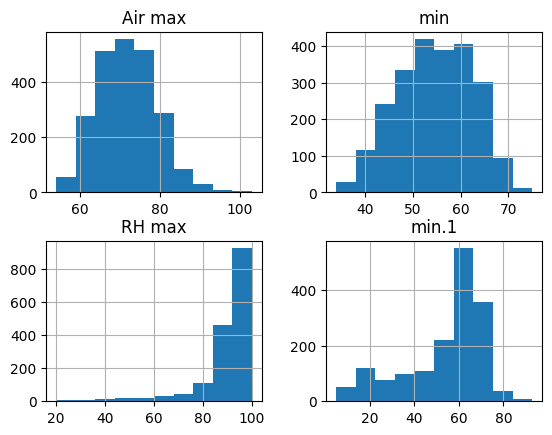

In [8]:
weather.hist()

# Combining Datasets

In [38]:
final_df = pd.concat([calendar, listings], axis = 1)

In [40]:
final_df.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,id,listing_url,scrape_id,last_scraped,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9477671,2024-02-17,f,95.0,1,14,199568.0,https://www.airbnb.com/rooms/199568,2.023063e+13,2023-06-25,...,4.96,4.87,4.92,NaN,f,1.0,1.0,0.0,0.0,1.35
1,9477671,2024-02-16,f,95.0,1,14,5021839.0,https://www.airbnb.com/rooms/5021839,2.023063e+13,2023-06-25,...,5.00,5.00,5.00,NaN,f,1.0,1.0,0.0,0.0,0.46
2,9477671,2024-02-15,f,90.0,1,14,7293821.0,https://www.airbnb.com/rooms/7293821,2.023063e+13,2023-06-25,...,4.99,4.98,4.90,NaN,f,1.0,1.0,0.0,0.0,4.07
3,9477671,2024-02-14,f,90.0,1,14,8524259.0,https://www.airbnb.com/rooms/8524259,2.023063e+13,2023-06-25,...,5.00,5.00,5.00,NaN,f,2.0,0.0,2.0,0.0,0.04
4,9477671,2024-02-13,f,90.0,1,14,8698684.0,https://www.airbnb.com/rooms/8698684,2.023063e+13,2023-06-25,...,4.98,4.89,4.81,NaN,t,3.0,1.0,2.0,0.0,0.98
